# FuzzyNetwork Demo - Regression

Demonstrate regression modeling with FuzzyNewtwork.

In [1]:
import sys
sys.path.append("../../src")

In [2]:
import numpy

from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam
from keras.metrics import MeanSquaredError

from sofenn import FuzzyNetwork
from sofenn.losses import CustomLoss

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 1) Load and Preprocess Data
Load Iris dataset and create X/y train/test datasets.

In [3]:
samples = 100
features = 1

x_shape = (samples, features)
x = numpy.linspace(0, samples * features - 1, samples * features).reshape(samples, features)
noise = numpy.random.normal(0, .5, (samples, 1))
W = numpy.random.randint(0, 10, (features, 1))
y = numpy.dot(x, W) + noise

train_samples = int(0.75 * len(x))
X_train, X_test = x[:train_samples], x[train_samples:]
y_train, y_test = y[:train_samples], y[train_samples:]

# preview datasets
print(f"X_train preview: \n{X_train[:5]}")
print(f"\ny_train preview: \n{y_train[:5]}")

X_train preview: 
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]]

y_train preview: 
[[0.64188271]
 [1.28405441]
 [1.18288125]
 [3.80302599]
 [4.5231699 ]]


## 2) Train FuzzyNetwork
Create FuzzyNetwork model and train on Iris data.

In [4]:
fuzz = FuzzyNetwork(
            input_shape=X_train.shape,
            neurons=3,
            num_classes=1
)
# X_train.shape = (75, 5)

In [5]:
X_train.shape

(75, 1)

In [6]:
fuzz.compile(
    loss=CustomLoss(),
    optimizer=Adam(),
    metrics=[MeanSquaredError()]
)
fuzz.summary()

Model: "FuzzyNetwork Summary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ InputRow (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 3)                 │               6 │ InputRow[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 3)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 3)                 │               6 │ InputRow[0][0],            │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               1 │ Weights[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
epochs=500
batch_size=32

fuzz.fit(X_train, y_train, 
         epochs=epochs, verbose=1, batch_size=batch_size)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27407.9531 - mean_squared_error: 1803.6128  
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28871.0273 - mean_squared_error: 1902.4514 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28490.6719 - mean_squared_error: 1855.7490 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27494.4902 - mean_squared_error: 1821.2668 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29244.0391 - mean_squared_error: 1887.8429 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27321.6055 - mean_squared_error: 1796.5721 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28158.3555 - mean_squared_error: 1826.4166 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27489.2656 - mean_squared_error: 1787.2507 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26587.9883 - mean_squared_error: 1749.9955 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28204.3008 - mean_squared_error:

## 3) Evaluate Predictions

Calculate accuracy on holdout samples.

In [8]:
y_pred = fuzz.predict(X_test)
y_pred[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[74.89192 ],
       [75.87611 ],
       [76.86028 ],
       [77.844444],
       [78.82861 ]], dtype=float32)

In [9]:
acc = y_test - y_pred
acc[:5]

array([[ 0.68166586],
       [ 0.84143743],
       [ 0.77775706],
       [-0.0750267 ],
       [ 0.31361777]])

In [10]:
acc.sum() / acc.size

np.float64(0.5205152691402674)

Calculate binary accuracy on holdout sample.

In [11]:
pred_loss, pred_bin_acc = fuzz.evaluate(X_test, y_test)
print(f'Model Loss: {pred_loss: 0.8f}')
print(f'Accuracy: {100 * pred_bin_acc: 2.1f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 6.0489 - mean_squared_error: 0.4839
Model Loss:  6.04886580
Accuracy:  48.4%


## 4) Plot Results

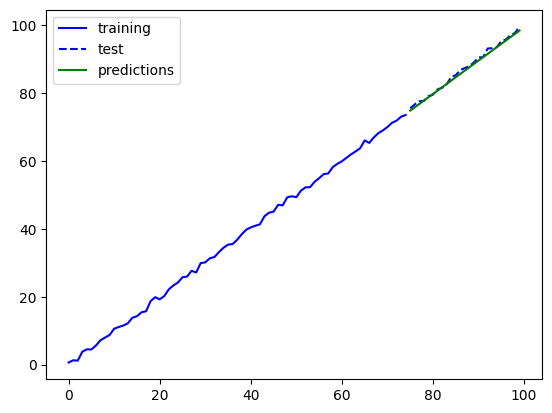

In [12]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, label='training', color='b')
plt.plot(X_test, y_test, label='test', color='b', linestyle='--')
plt.plot(X_test, y_pred, label='predictions', color='g')
plt.legend()